In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Import Library**


In [ ]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle

1.1.5
1.15.2


# **PREDICTION MODELS**

# **ALL ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testnn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['WALKING', 'WALKING_UPSTAIRS', 'STANDING', 'SITTING', 'LAYING',
       'WALKING_DOWNSTAIRS'],
      dtype='object', name='ActivityName')

In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
ActivityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WALKING,0.350520,-0.000554,-0.104551,-0.419906,0.193854,-0.494848,-0.414298,0.084772,-0.447437,-0.268445,0.295224,-0.499627,0.411500,-0.035523,0.622678,-0.220015,-0.829341,-0.724679,-0.881978,-0.421713,-0.310696,-0.404712,0.403663,0.336767,0.137759,-0.494099,0.466220,-0.297731,0.164919,-0.362556,0.321277,0.160669,-0.195083,-0.080566,0.073048,0.209128,-0.390336,0.221301,-0.056681,0.364078,...,0.375366,-0.904762,-0.145425,-0.099057,-0.501877,-0.516003,-0.545558,-0.504875,-0.600845,-0.845587,-0.516003,-0.863878,-0.569582,0.530267,-0.846154,0.113797,-0.376793,-0.716473,-0.495967,-0.461246,-0.539194,-0.363430,-0.921143,-0.495967,-0.855164,-0.592573,0.433461,-0.904762,0.125236,0.528744,0.328656,-0.631872,-0.072660,0.403802,-0.136318,-0.953341,0.127492,0.032475,5,1
WALKING_UPSTAIRS,0.390527,-0.011742,-0.067125,-0.308290,0.052510,-0.366199,-0.355363,0.072635,-0.342998,-0.047399,-0.137999,-0.419935,0.328975,0.160417,0.504465,-0.159854,-0.756882,-0.785865,-0.814092,-0.441200,-0.148368,-0.373833,0.535947,0.381726,0.171154,-0.416975,0.318542,-0.136366,0.127220,-0.506797,0.468509,-0.210845,0.128232,-0.448049,0.414170,-0.316039,0.042525,-0.597414,-0.382223,0.384219,...,0.236427,-0.904762,-0.101729,-0.145986,-0.562487,-0.315976,-0.005521,-0.103670,-0.032451,-0.735865,-0.315976,-0.513562,-0.583000,0.469954,-1.000000,-0.319297,-0.006521,-0.409901,-0.649711,-0.649787,-0.626508,-0.701823,-0.783118,-0.649711,-0.933858,-0.593501,0.279566,-0.904762,-0.005141,-0.145900,-0.564472,-0.446039,0.625086,-0.919550,-0.289286,-0.570353,0.359512,0.157438,3,2
STANDING,0.275256,-0.021567,-0.108148,-0.997199,-0.987651,-0.990881,-0.997426,-0.987334,-0.992499,-0.943756,-0.573242,-0.814571,0.848543,0.686246,0.842772,-0.993906,-0.999983,-0.999888,-0.999839,-0.996534,-0.987739,-0.997235,-0.736298,-0.781926,-0.597442,0.166197,-0.016942,0.042912,0.039119,0.186072,-0.129027,0.174156,0.066083,0.257654,-0.041770,-0.017928,0.246924,0.106383,-0.000575,0.020093,...,-1.000000,0.365079,0.542423,-0.685878,-0.932693,-0.993776,-0.993047,-0.991545,-0.995473,-0.997176,-0.993776,-0.999948,-0.989714,-0.872354,-0.794872,-0.077676,-0.646824,-0.896970,-0.997448,-0.997636,-0.997244,-0.998268,-0.999550,-0.997448,-0.999990,-0.997118,-1.000000,-1.000000,0.442230,-0.690160,-0.917348,0.022188,0.313823,0.617589,-0.411062,-0.820386,0.220717,

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
GTrain = train.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING']]
GTest = test.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING']]

In [ ]:
# get X_train and X_test from csv files
X_train = GTrain
X_test = GTest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 7352 instances of data with 561 total features
Training data includes value counts of
 LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
 LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


## **Function to plot the confusion matrix**

**Labels that are useful in plotting confusion matrix**

In [ ]:
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized Confusion Matrix'
        cmap = plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Generic function to run any model specified**

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
   # calculate overall accuracty of the model
    scores = cross_val_score(model, X_train, y_train)
    avg = scores.mean()
    # store accuracy in results
    print('---------------------')
    print('|      Train Accuracy      |')
    print('---------------------')
    print('\nperformances: {}, \nAverage: {}\n\n'.format(scores, avg))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## **Method to print the gridsearch Attributes**

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## **Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

#redifine labels
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.797304


---------------------
|      Train Accuracy      |
---------------------

performances: [0.985724   0.98232495 0.97755102 0.98367347 0.9877551 ], 
Average: 0.9834057076263545


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011250


---------------------
|      Accuracy      |
---------------------

    0.9579233118425518


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


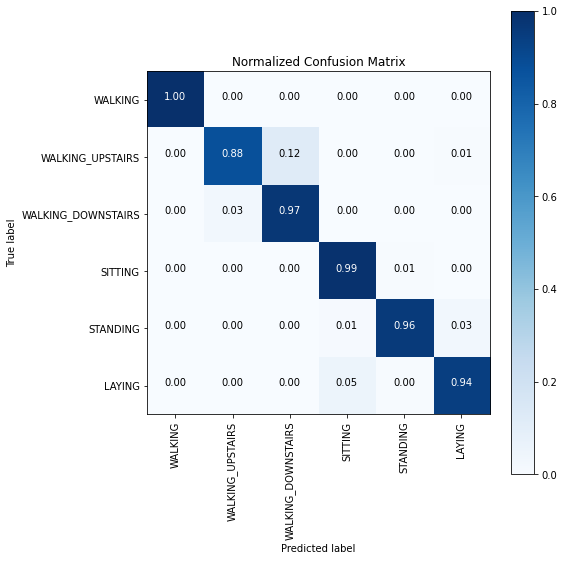

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
lr = LogisticRegression(random_state=0)
log_results =  perform_model(lr, X_train, y_train, X_test, y_test, class_labels=labels)

### Logistic Regression + Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   12.5s remaining:    8.9s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   27.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:31.377527


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   10.7s remaining:    7.6s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   22.7s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   10.6s remaining:    7.6s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   22.3s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   10.3s remaining:    7.4s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   22.1s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   10.4s remaining:    7.4s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   21.9s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   10.1s remaining:    7.2s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   21.7s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98504419 0.98300476 0.97755102 0.98231293 0.9877551 ], 
Average: 0.983133598782817


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012388


---------------------
|      Accuracy      |
---------------------

    0.9548693586698337


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 425  64   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 491   3   2]
 [  0   0   0   5 407   8]
 [  0   0   0  27   8 436]]


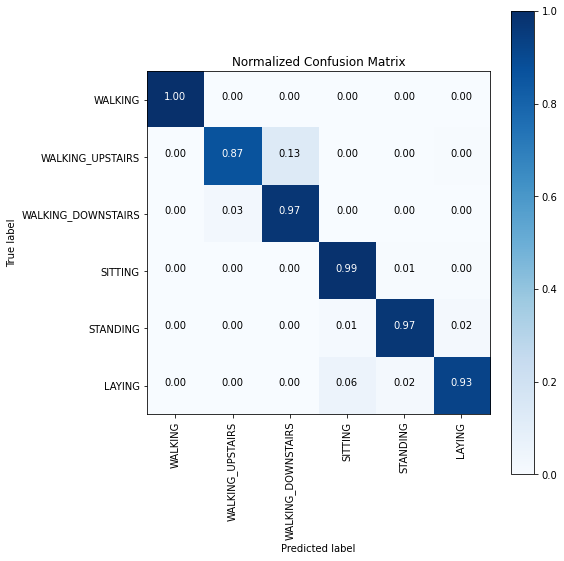

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.96       496
           4       0.97      0.97      0.97       420
           5       0.97      0.93      0.95       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

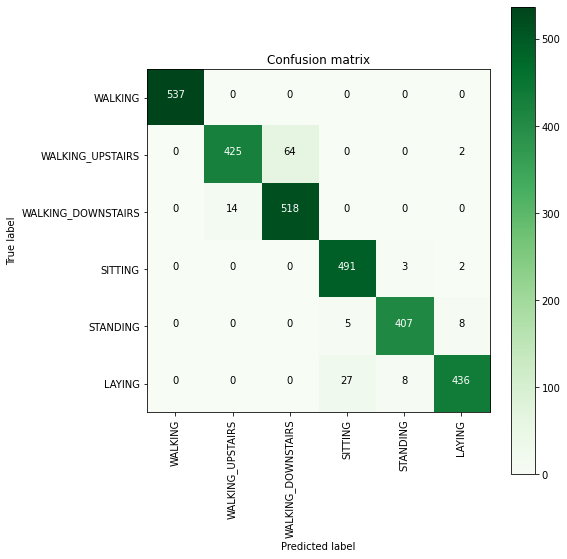

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 20, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9806858230848438



#### Logistic Regression + Grid Search 1/1

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.049145


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.95581237 0.94901428 0.95442177 0.94693878 0.95714286], 
Average: 0.9526660099797907


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011896


---------------------
|      Accuracy      |
---------------------

    0.9443501866304717


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 427  60   0   0   3]
 [  0  31 499   1   0   1]
 [  0   0   0 492   4   0]
 [  0   0   0  12 381  27]
 [  0   0   0  20   4 447]]


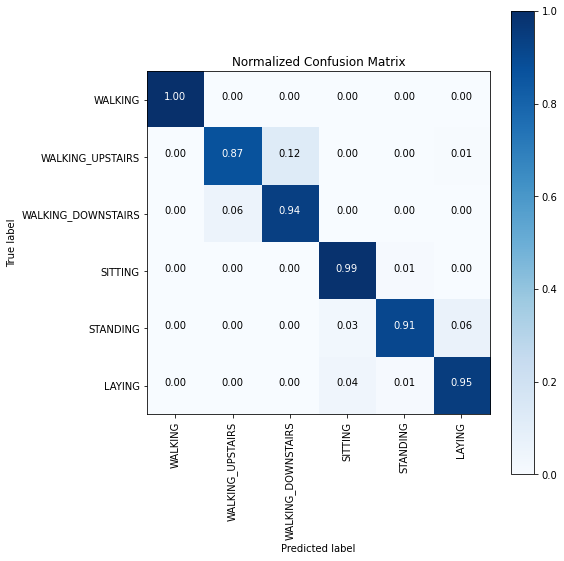

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.87      0.90       491
           2       0.89      0.94      0.91       532
           3       0.94      0.99      0.96       496
           4       0.98      0.91      0.94       420
           5       0.94      0.95      0.94       471

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.1s finished


ValueError: ignored

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.4s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.282528


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98300476 0.97416723 0.97619048 0.97823129 0.97482993], 
Average: 0.9772847385045113


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012758


---------------------
|      Accuracy      |
---------------------

    0.9552086868001357


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 432  56   0   0   3]
 [  0  19 513   0   0   0]
 [  0   0   0 492   4   0]
 [  0   0   0   5 395  20]
 [  0   0   0  22   3 446]]


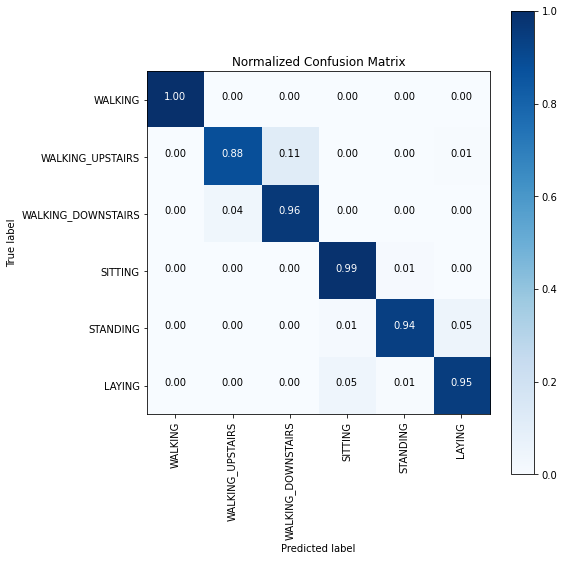

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.96      0.93       532
           3       0.95      0.99      0.97       496
           4       0.98      0.94      0.96       420
           5       0.95      0.95      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.499662


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.985724   0.98232495 0.97755102 0.98367347 0.9877551 ], 
Average: 0.9834057076263545


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011616


---------------------
|      Accuracy      |
---------------------

    0.9579233118425518


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


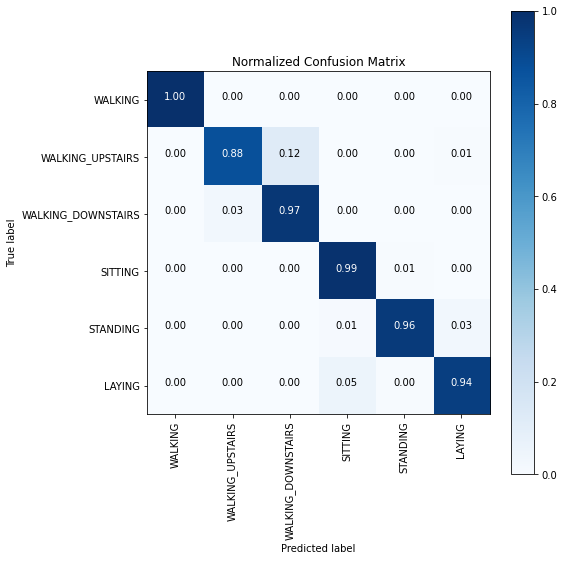

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.1s finished


ValueError: ignored

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.234266


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98504419 0.98300476 0.97823129 0.98367347 0.9877551 ], 
Average: 0.9835417620481233


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012331


---------------------
|      Accuracy      |
---------------------

    0.9592806243637597


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 426  62   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 492   2   2]
 [  0   0   0   6 407   7]
 [  0   0   0  23   3 445]]


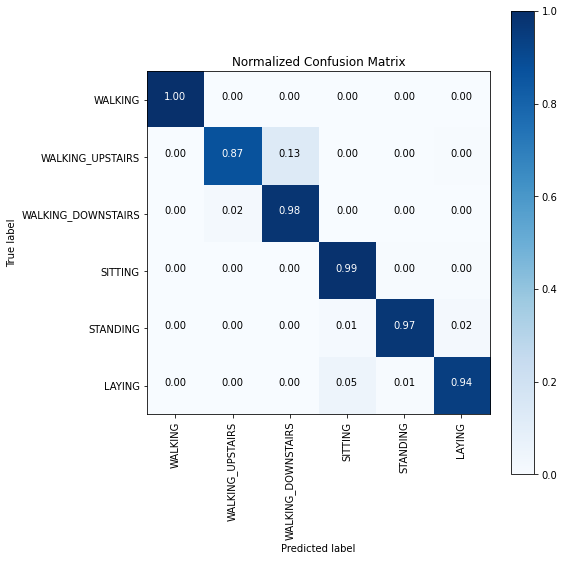

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.89      0.98      0.93       532
           3       0.94      0.99      0.97       496
           4       0.99      0.97      0.98       420
           5       0.98      0.94      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.4s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.171510


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.985724   0.98300476 0.97891156 0.98231293 0.98707483], 
Average: 0.983405615135245


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011441


---------------------
|      Accuracy      |
---------------------

    0.9548693586698337


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 425  64   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 491   3   2]
 [  0   0   0   5 407   8]
 [  0   0   0  27   8 436]]


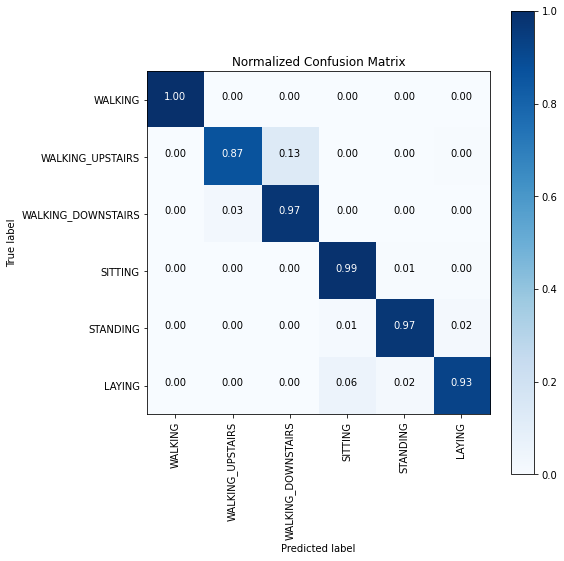

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.96       496
           4       0.97      0.97      0.97       420
           5       0.97      0.93      0.95       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    4.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.610005


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    3.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98300476 0.98232495 0.97687075 0.98095238 0.98707483], 
Average: 0.9820455333731045


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011884


---------------------
|      Accuracy      |
---------------------

    0.9596199524940617


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  61   0   0   2]
 [  0  11 521   0   0   0]
 [  0   0   0 490   4   2]
 [  0   0   0   3 404  13]
 [  0   0   1  19   3 448]]


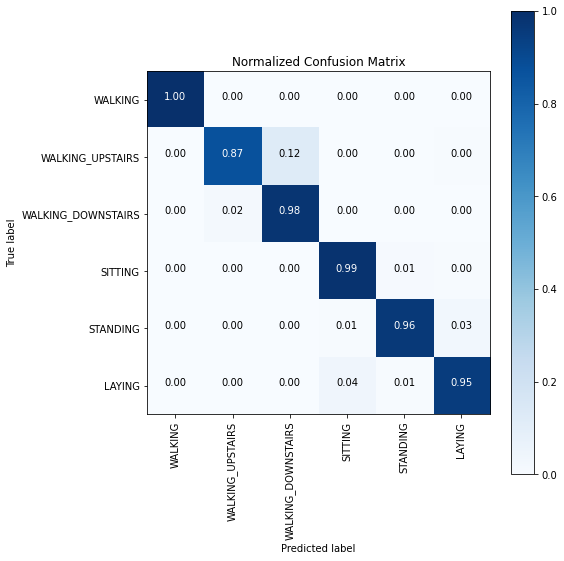

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.89      0.98      0.93       532
           3       0.96      0.99      0.97       496
           4       0.98      0.96      0.97       420
           5       0.96      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy ALL ACTIVITY**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.96%       4.038%


# **XXXXXXXXXXXXXXXXXXXXXXXXXXXX**

# **DINAMIC ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testnn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['WALKING_UPSTAIRS', 'LAYING', 'STANDING', 'WALKING',
       'WALKING_DOWNSTAIRS', 'SITTING'],
      dtype='object', name='ActivityName')

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
DTrain = train.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]
DTest = test.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]

In [ ]:
# get X_train and X_test from csv files
X_train = DTrain
X_test = DTest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 3285 instances of data with 561 total features
Training data includes value counts of
 WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64


Testing data consists of 1387 instances of data
Testing data includes value counts of
 WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((3285, 561),(3285,))
X_test  and y_test  : ((1387, 561),(1387,))


## **Function to plot the confusion matrix**

**Labels that are useful in plotting confusion matrix**

In [ ]:
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized Confusion Matrix'
        cmap = plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Generic function to run any model specified**

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## **Method to print the gridsearch Attributes**

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## **Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

#redifine labels
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.363867


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99543379 1.         0.99695586 0.99847793], 
Average: 0.9978691019786909


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005649


---------------------
|      Accuracy      |
---------------------

    0.969718817591925


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  3 406  11]
 [ 23   2 446]]


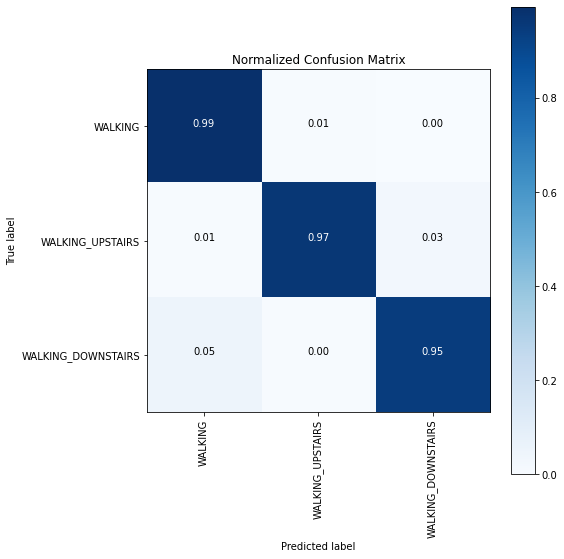

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.95      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
lr = LogisticRegression(random_state=0)
log_results =  perform_model(lr, X_train, y_train, X_test, y_test, class_labels=labels)

### **Logistic Regression + Grid Search**

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    6.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.451224


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    4.8s finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    4.8s finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    4.9s finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    4.9s finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    4.9s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99543379 1.         0.99847793 0.99847793], 
Average: 0.9981735159817351


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006553


---------------------
|      Accuracy      |
---------------------

    0.9704397981254506


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  3 408   9]
 [ 24   2 445]]


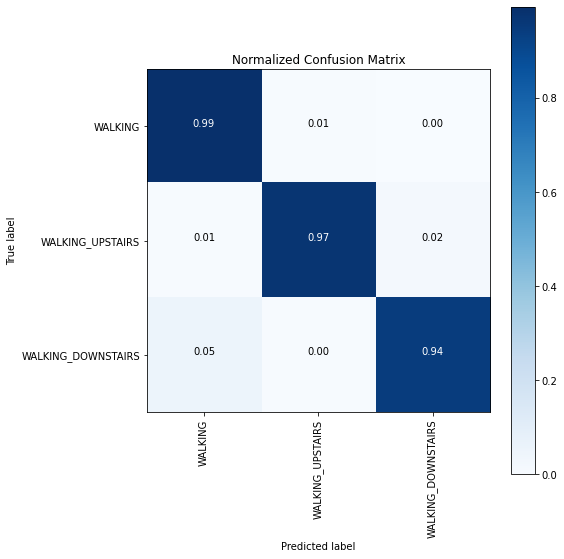

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.94      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
# start Grid search
parameters = {'C':[0.1, 1, 10], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

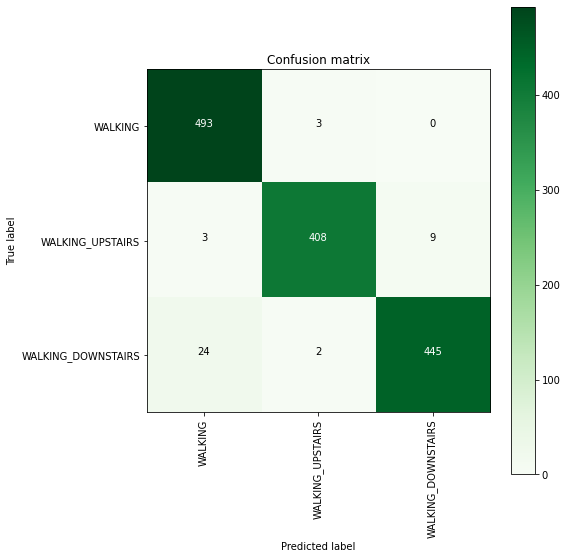

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9975646879756468



#### Logistic Regression + Grid Search 1/1

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.321438


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.5s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98325723 0.96499239 0.97412481 0.97564688 0.98021309], 
Average: 0.9756468797564688


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005333


---------------------
|      Accuracy      |
---------------------

    0.9444844989185291


--------------------
| Confusion Matrix |
--------------------

 [[492   4   0]
 [ 18 373  29]
 [ 20   6 445]]


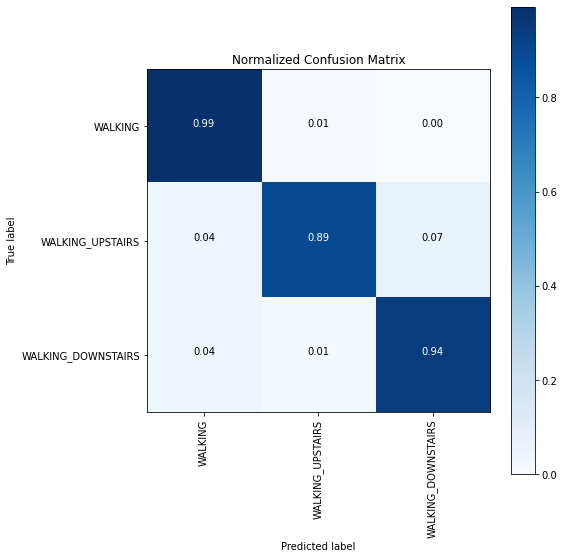

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       496
           1       0.97      0.89      0.93       420
           2       0.94      0.94      0.94       471

    accuracy                           0.94      1387
   macro avg       0.95      0.94      0.94      1387
weighted avg       0.95      0.94      0.94      1387



In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.1s finished


ValueError: ignored

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.395214


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99695586 0.98782344 0.99543379 0.99543379 0.99238965], 
Average: 0.993607305936073


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006694


---------------------
|      Accuracy      |
---------------------

    0.9617880317231434


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  7 393  20]
 [ 21   2 448]]


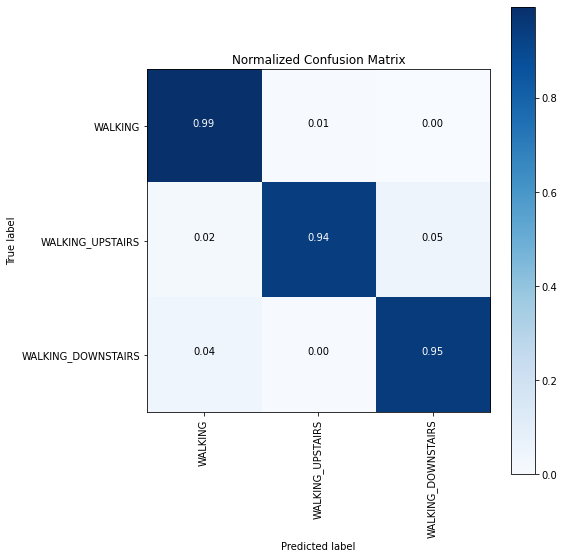

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.94      0.96       420
           2       0.96      0.95      0.95       471

    accuracy                           0.96      1387
   macro avg       0.96      0.96      0.96      1387
weighted avg       0.96      0.96      0.96      1387



In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.375093


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99543379 1.         0.99695586 0.99847793], 
Average: 0.9978691019786909


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006340


---------------------
|      Accuracy      |
---------------------

    0.969718817591925


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  3 406  11]
 [ 23   2 446]]


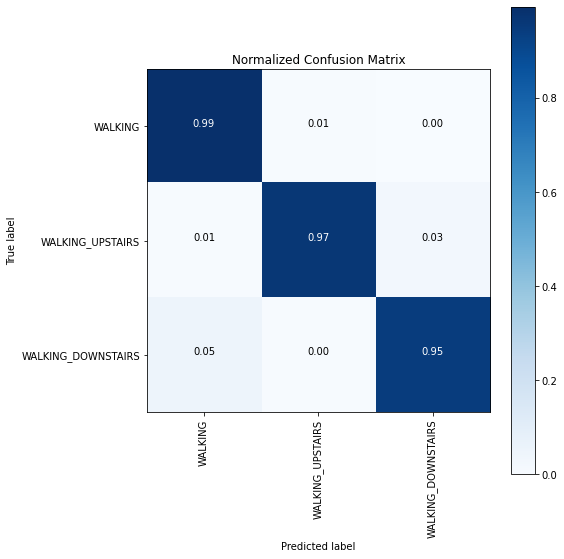

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.95      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.367250


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99543379 1.         0.99847793 0.99847793], 
Average: 0.9981735159817351


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007652


---------------------
|      Accuracy      |
---------------------

    0.9704397981254506


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  3 408   9]
 [ 24   2 445]]


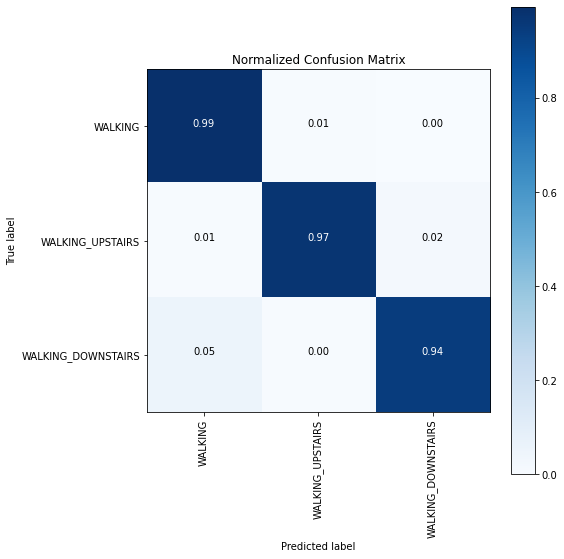

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.94      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.374787


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99543379 1.         0.99847793 0.99847793], 
Average: 0.9981735159817351


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006242


---------------------
|      Accuracy      |
---------------------

    0.969718817591925


--------------------
| Confusion Matrix |
--------------------

 [[493   3   0]
 [  3 407  10]
 [ 24   2 445]]


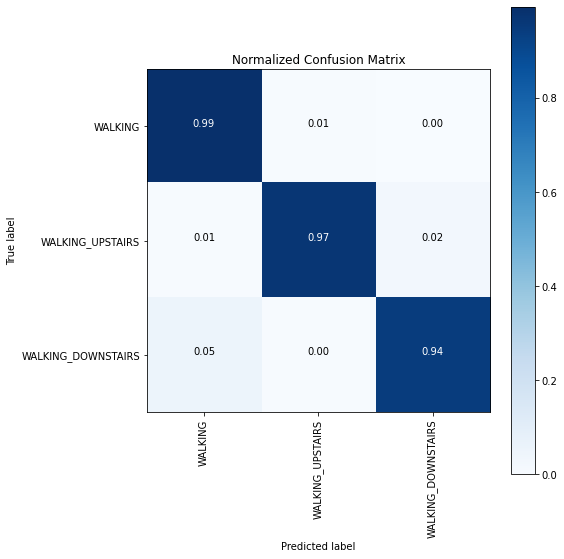

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.94      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.357481


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.5s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99695586 0.99695586 1.         0.99847793 0.99847793], 
Average: 0.9981735159817351


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006108


---------------------
|      Accuracy      |
---------------------

    0.9711607786589762


--------------------
| Confusion Matrix |
--------------------

 [[494   2   0]
 [  3 407  10]
 [ 23   2 446]]


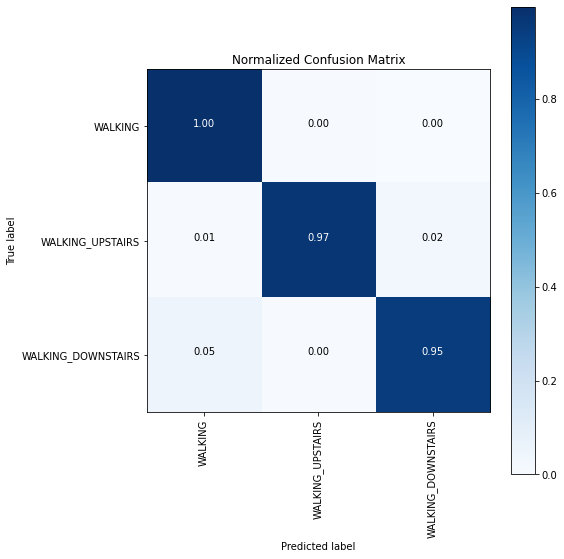

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       496
           1       0.99      0.97      0.98       420
           2       0.98      0.95      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy DINAMIC ACTIVITY**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 97.12%       2.884%


# **STATIC ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testnn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['WALKING_DOWNSTAIRS', 'WALKING', 'STANDING', 'WALKING_UPSTAIRS',
       'LAYING', 'SITTING'],
      dtype='object', name='ActivityName')

In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
ActivityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WALKING_DOWNSTAIRS,0.209338,-0.028714,-0.065308,0.499081,0.236986,-0.194195,0.381856,0.057745,-0.279106,0.707671,-0.014866,0.092040,-0.275911,-0.518799,0.390387,0.270418,0.123167,-0.704889,-0.703995,0.064428,-0.379185,-0.448068,0.241751,0.385958,0.112891,-0.242543,0.166467,-0.210394,0.427250,0.119102,-0.125464,0.419660,-0.191786,0.464880,-0.175746,0.347954,-0.130424,-0.487256,-0.098589,0.033279,...,0.708900,-0.873016,-0.073648,-0.024541,-0.352098,-0.282439,-0.227627,-0.106087,-0.455158,-0.936690,-0.282439,-0.648696,-0.249454,0.538947,-0.794872,-0.238755,-0.478135,-0.816343,-0.475256,-0.385238,-0.370910,-0.358262,-0.614892,-0.475256,-0.828208,-0.398713,0.491097,-0.873016,-0.201344,0.128580,-0.201879,0.432098,-0.030868,-0.707364,-0.239922,-0.861459,0.193352,0.006626,15,3
WALKING,0.260465,-0.017430,-0.121875,-0.217424,0.105272,-0.142486,-0.279774,0.136827,-0.150986,-0.058665,-0.131620,-0.319561,0.140402,0.064192,0.232090,-0.045820,-0.692486,-0.764129,-0.668404,-0.369173,-0.072106,-0.193270,0.447732,0.333651,0.307553,-0.548597,0.573947,-0.287978,0.042379,-0.256312,0.237246,0.037687,-0.050916,-0.180851,0.219816,-0.052389,-0.009266,-0.383375,-0.141005,0.504794,...,0.240073,-0.873016,0.100379,0.875455,0.809980,-0.442696,-0.475895,-0.515330,-0.446011,-0.628568,-0.442696,-0.819499,-0.613049,0.510327,-0.794872,0.496760,-0.053692,-0.390216,-0.517013,-0.412147,-0.516011,-0.326882,-0.526852,-0.517013,-0.848380,-0.604789,0.355593,-0.873016,0.341046,0.508205,0.248896,0.273440,0.198788,-0.905805,-0.514406,-0.594839,0.337593,0.162893,21,1
STANDING,0.278790,-0.018585,-0.106908,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,0.687431,0.844895,-0.992214,-0.999986,-0.999885,-0.999674,-0.997176,-0.989794,-0.983728,-0.652548,-0.678458,-0.486837,0.240777,-0.160030,0.105931,0.123825,0.238010,-0.216567,0.290286,0.180573,0.113576,0.007330,-0.130344,0.193174,-0.194790,0.029177,0.459914,...,-1.000000,-0.904762,0.668020,-0.598248,-0.867453,-0.984749,-0.974862,-0.979054,-0.970209,-0.995766,-0.984749,-0.999635,-0.991210,-0.678570,-1.000000,-0.257360,0.310607,0.038325,-0.994110,-0.993583,-0.993400,-0.993002,-0.995307,-0.994110,-0.999963,-0.993119,-0.955696,-1.000000,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.16

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
STrain = train.loc[['SITTING', 'STANDING', 'LAYING']]
STest = test.loc[['SITTING', 'STANDING', 'LAYING']]

In [ ]:
# get X_train and X_test from csv files
X_train = STrain
X_test = STest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['SITTING', 'STANDING', 'LAYING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 4067 instances of data with 561 total features
Training data includes value counts of
 LAYING      1407
STANDING    1374
SITTING     1286
Name: ActivityName, dtype: int64


Testing data consists of 1560 instances of data
Testing data includes value counts of
 LAYING      537
STANDING    532
SITTING     491
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((4067, 561),(4067,))
X_test  and y_test  : ((1560, 561),(1560,))


## **Function to plot the confusion matrix**

**Labels that are useful in plotting confusion matrix**

In [ ]:
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized Confusion Matrix'
        cmap = plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Generic function to run any model specified**

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## **Method to print the gridsearch Attributes**

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## **Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

#redifine labels
labels=["SITTING", "STANDING", "LAYING"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.728172


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97911548 0.97420147 0.97539975 0.97785978 0.97416974], 
Average: 0.9761492455219392


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006775


---------------------
|      Accuracy      |
---------------------

    0.9576923076923077


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 436  55]
 [  0  11 521]]


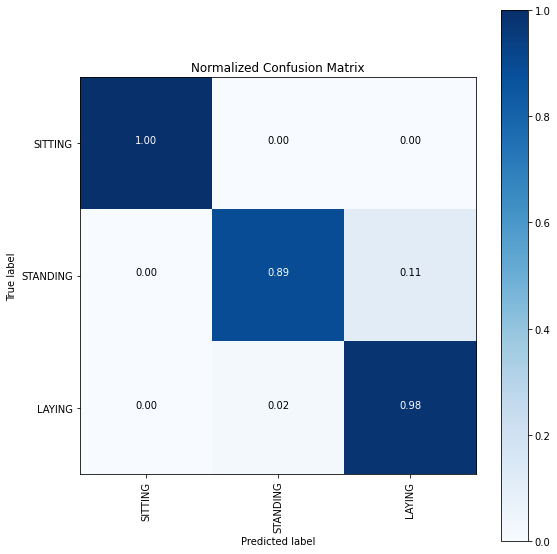

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.90      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
lr = LogisticRegression(random_state=0)
log_results =  perform_model(lr, X_train, y_train, X_test, y_test, class_labels=labels)

### Logistic Regression + Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    6.8s remaining:    4.9s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   14.8s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.484005


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    5.9s remaining:    4.2s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    5.8s remaining:    4.1s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    5.8s remaining:    4.2s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    5.7s remaining:    4.1s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   12.0s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97911548 0.97542998 0.97539975 0.97785978 0.97416974], 
Average: 0.9763949457676395


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006937


---------------------
|      Accuracy      |
---------------------

    0.9596153846153846


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 438  53]
 [  0  10 522]]


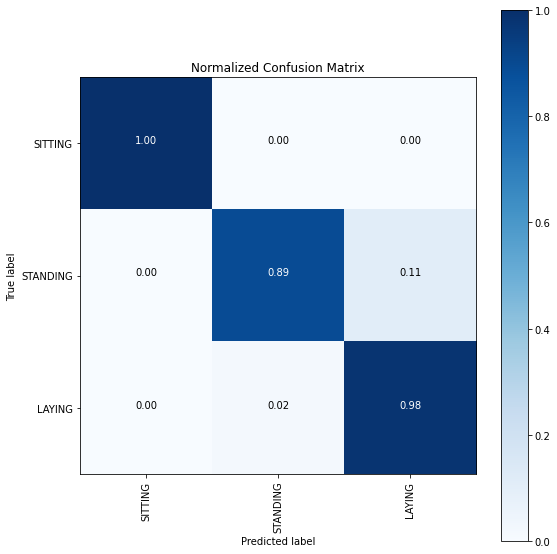

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

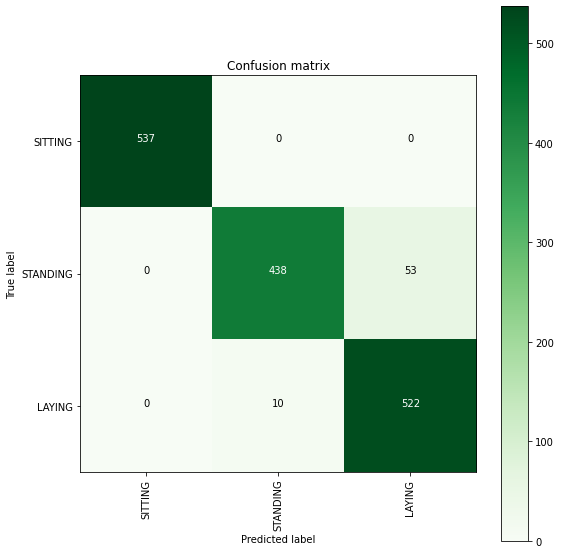

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.975903551070909



#### Logistic Regression + Grid Search 1/1

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.196399


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.94594595 0.92628993 0.94587946 0.93726937 0.91758918], 
Average: 0.9345947759231891


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005889


---------------------
|      Accuracy      |
---------------------

    0.941025641025641


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 430  61]
 [  0  31 501]]


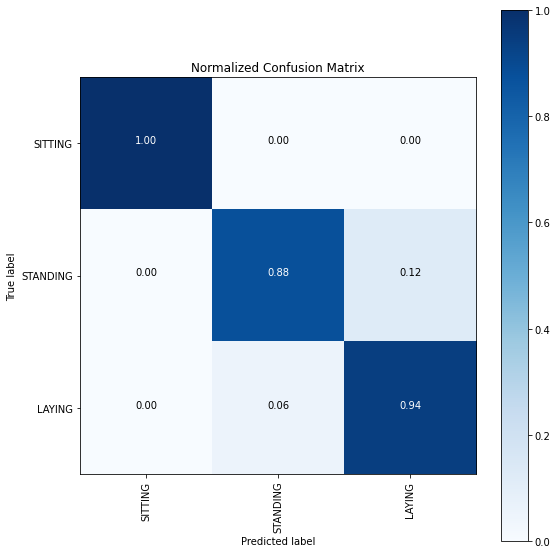

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.88      0.90       491
           2       0.89      0.94      0.92       532

    accuracy                           0.94      1560
   macro avg       0.94      0.94      0.94      1560
weighted avg       0.94      0.94      0.94      1560



In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.01], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.4s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.104845


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97051597 0.96560197 0.96555966 0.96678967 0.96555966], 
Average: 0.9668053830415453


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008535


---------------------
|      Accuracy      |
---------------------

    0.9532051282051283


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 438  53]
 [  0  20 512]]


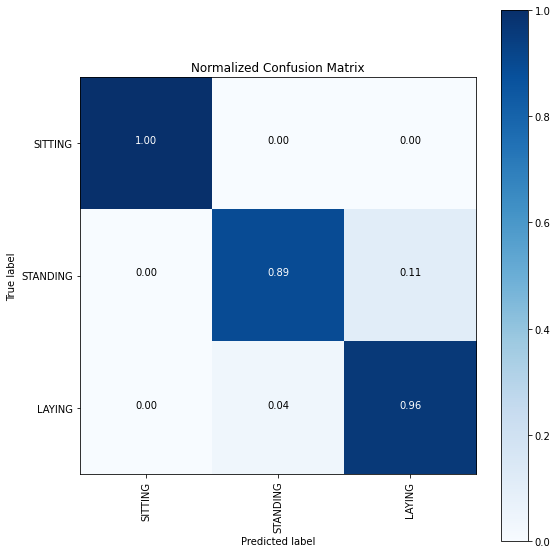

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.89      0.92       491
           2       0.91      0.96      0.93       532

    accuracy                           0.95      1560
   macro avg       0.95      0.95      0.95      1560
weighted avg       0.95      0.95      0.95      1560



In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[0.1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.4s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.188634


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97911548 0.97420147 0.97539975 0.97785978 0.97416974], 
Average: 0.9761492455219392


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006239


---------------------
|      Accuracy      |
---------------------

    0.9576923076923077


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 436  55]
 [  0  11 521]]


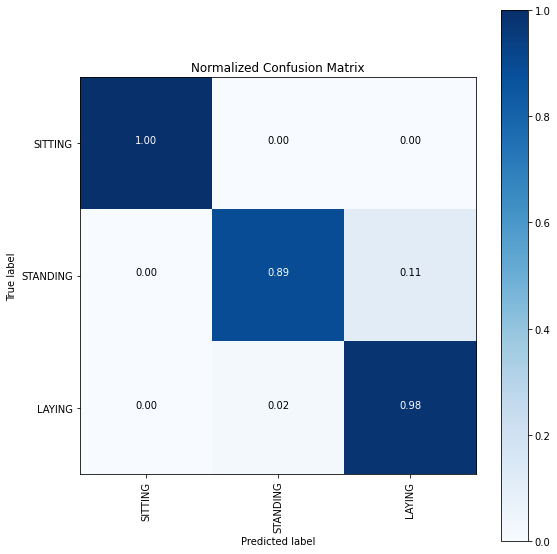

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.90      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[1], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.393059


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.1s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97542998 0.97542998 0.9803198  0.97785978 0.97416974], 
Average: 0.976641854870637


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009969


---------------------
|      Accuracy      |
---------------------

    0.9596153846153846


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 438  53]
 [  0  10 522]]


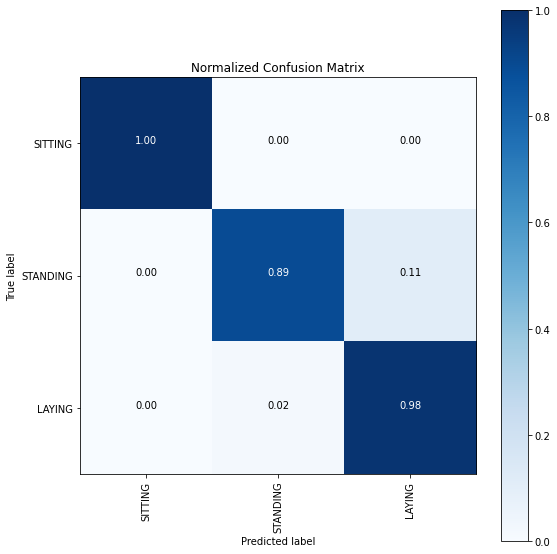

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[10], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.349848


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.9s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97420147 0.97297297 0.97785978 0.97908979 0.97539975], 
Average: 0.9759047541335365


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007925


---------------------
|      Accuracy      |
---------------------

    0.9596153846153846


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 438  53]
 [  0  10 522]]


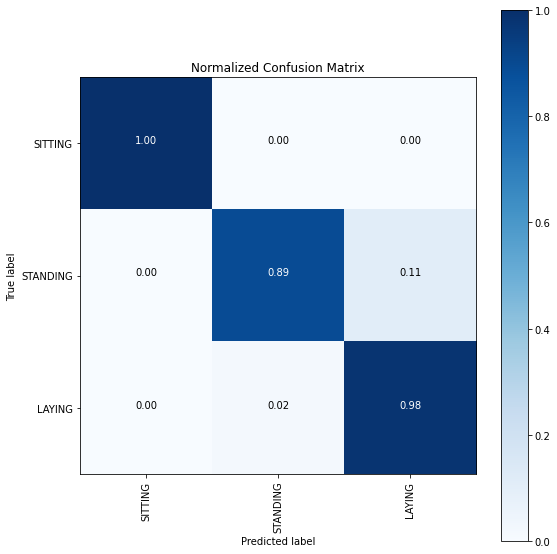

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[20], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.156628


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.0s finished


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97788698 0.97542998 0.97908979 0.97416974 0.97416974], 
Average: 0.9761492455219394


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006599


---------------------
|      Accuracy      |
---------------------

    0.9583333333333334


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 437  54]
 [  0  11 521]]


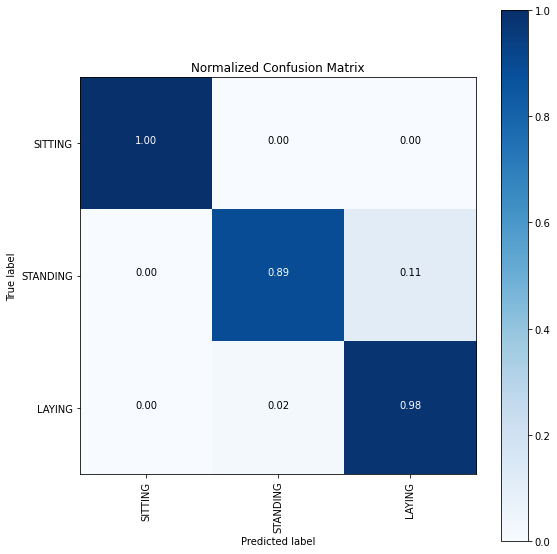

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# start Grid search
parameters = {'C':[30], 'penalty':['l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy STATIC ACTIVITY**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.83%       4.167%
